In [1]:
# dependecies
import os
import os.path 
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer  
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import LancasterStemmer 
from nltk.tokenize import word_tokenize  
import numpy as np
import math

In [2]:
# creating a list containing all folder names of the dataset
folders = ["business","entertainment","politics","sport","tech"]

In [3]:
os.chdir('bbc') 

In [4]:
# generating  a list call paths containg all the detailed paths for accessing the folders of the dataset 
paths = []
for i in folders:
    paths.append(os.getcwd()+'/'+i)

In [5]:
texts = []
labels = []
filenames = []

In [6]:
# getting the path of a folders one by one from the list called paths[]
for path in paths:
#     getting filenames one by one from the list of all files under a directory called path
    for filename in os.listdir(path):
#         opening the file in read only mode with encoding latin1
        with open(path+"/"+filename,"r", encoding = "latin") as file:
#             after reading the file contents are stored in a variable called data
            data = file.read()
#             after removing all newline characters and carriage return from the  data,
#             it is being added at the end of the list texts
            data = data.replace("\n"," ").replace('\r','')
            texts.append(data)
            file.close() # file is being closed
#         setting the category of the news as the folder name in which it reside  
        labels.append(os.path.basename(path)) # from the whole path basename only returns the folder name
        filenames.append(filename) # from the whole path basename only returns the folder name

In [7]:
df = pd.DataFrame({'texts':texts,'labels':labels})

In [8]:
# adding dependencies to encode the categories of the news  with integer
from sklearn.preprocessing import LabelEncoder

In [9]:
# Encoding the categories of the news  with integer
df["labels_to_category"] = LabelEncoder().fit_transform(df["labels"])
# verfing by printing last 11 data from the dataframe
df.tail(11)

texts labels  \
2224  Savvy searchers fail to spot ads  Internet sea...   tech   
2225  TV's future down the phone line  Internet TV h...   tech   
2226  Cebit fever takes over Hanover  Thousands of p...   tech   
2227  New consoles promise big problems  Making game...   tech   
2228  BT program to beat dialler scams  BT is introd...   tech   
2229  Spam e-mails tempt net shoppers  Computer user...   tech   
2230  Be careful how you code  A new European direct...   tech   
2231  US cyber security chief resigns  The man makin...   tech   
2232  Losing yourself in online gaming  Online role ...   tech   
2233  A quantum computer could catch its own errors ...   tech   
2234  Google probed by competition watchdog over ad ...   tech   

      labels_to_category  
2224                   4  
2225                   4  
2226                   4  
2227                   4  
2228                   4  
2229                   4  
2230                   4  
2231                   4  
2232                   4  
2233                   4  
2234                   4

<AxesSubplot:xlabel='labels'>

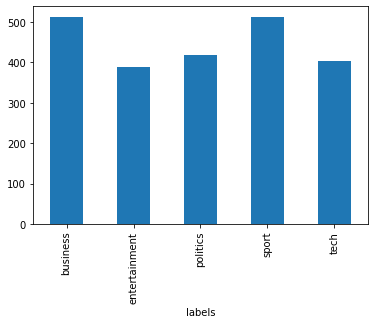

In [48]:
df.groupby('labels').labels.count().plot.bar(ylim=0)

In [10]:
df.head()

texts    labels  \
0  Ad sales boost Time Warner profit  Quarterly p...  business   
1  Dollar gains on Greenspan speech  The dollar h...  business   
2  Yukos unit buyer faces loan claim  The owners ...  business   
3  High fuel prices hit BA's profits  British Air...  business   
4  Pernod takeover talk lifts Domecq  Shares in U...  business   

   labels_to_category  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

In [11]:
df["texts"][0][:200]

'Ad sales boost Time Warner profit  Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.  The firm, which is now one '

In [12]:
for i, text in enumerate(texts):
    texts[i] = re.sub(r'[^a-zA-Z ]', '', text)

In [13]:
texts[0][:200]

'Ad sales boost Time Warner profit  Quarterly profits at US media giant TimeWarner jumped  to bn m for the three months to December from m yearearlier  The firm which is now one of the biggest investor'

In [14]:
#Case Folding
for i, text in enumerate(texts):
    texts[i] = text.lower()

texts[0][:200]

'ad sales boost time warner profit  quarterly profits at us media giant timewarner jumped  to bn m for the three months to december from m yearearlier  the firm which is now one of the biggest investor'

In [15]:
#Tokenizing and Stopword removal

for i, text in enumerate(texts):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    texts[i] = filtered_sentence

In [16]:
print(texts[0][:20])

['ad', 'sales', 'boost', 'time', 'warner', 'profit', 'quarterly', 'profits', 'us', 'media', 'giant', 'timewarner', 'jumped', 'bn', 'three', 'months', 'december', 'yearearlier', 'firm', 'one']


In [17]:
pStemmer = SnowballStemmer(language='english') 
for i, text in enumerate(texts):
    stemmed = []
    for word in text:
        stemmed.append(pStemmer.stem(word))
    texts[i] = stemmed
        

In [18]:
terms = [item for sublist in texts for item in sublist]

In [19]:
terms = list((dict.fromkeys(terms)))

In [20]:
print(len(texts))
print(len(terms))  

2235
21527


In [21]:
print(texts[0])

['ad', 'sale', 'boost', 'time', 'warner', 'profit', 'quarter', 'profit', 'us', 'media', 'giant', 'timewarn', 'jump', 'bn', 'three', 'month', 'decemb', 'yearearli', 'firm', 'one', 'biggest', 'investor', 'googl', 'benefit', 'sale', 'highspe', 'internet', 'connect', 'higher', 'advert', 'sale', 'timewarn', 'said', 'fourth', 'quarter', 'sale', 'rose', 'bn', 'bn', 'profit', 'buoy', 'oneoff', 'gain', 'offset', 'profit', 'dip', 'warner', 'bros', 'less', 'user', 'aol', 'time', 'warner', 'said', 'friday', 'own', 'searchengin', 'googl', 'internet', 'busi', 'aol', 'mix', 'fortun', 'lost', 'subscrib', 'fourth', 'quarter', 'profit', 'lower', 'preced', 'three', 'quarter', 'howev', 'compani', 'said', 'aol', 'under', 'profit', 'except', 'item', 'rose', 'back', 'stronger', 'internet', 'advertis', 'revenu', 'hope', 'increas', 'subscrib', 'offer', 'onlin', 'servic', 'free', 'timewarn', 'internet', 'custom', 'tri', 'sign', 'aol', 'exist', 'custom', 'highspe', 'broadband', 'timewarn', 'also', 'restat', 'res

In [22]:
print(terms[:len(texts[0])])

['ad', 'sale', 'boost', 'time', 'warner', 'profit', 'quarter', 'us', 'media', 'giant', 'timewarn', 'jump', 'bn', 'three', 'month', 'decemb', 'yearearli', 'firm', 'one', 'biggest', 'investor', 'googl', 'benefit', 'highspe', 'internet', 'connect', 'higher', 'advert', 'said', 'fourth', 'rose', 'buoy', 'oneoff', 'gain', 'offset', 'dip', 'bros', 'less', 'user', 'aol', 'friday', 'own', 'searchengin', 'busi', 'mix', 'fortun', 'lost', 'subscrib', 'lower', 'preced', 'howev', 'compani', 'under', 'except', 'item', 'back', 'stronger', 'advertis', 'revenu', 'hope', 'increas', 'offer', 'onlin', 'servic', 'free', 'custom', 'tri', 'sign', 'exist', 'broadband', 'also', 'restat', 'result', 'follow', 'probe', 'secur', 'exchang', 'commiss', 'sec', 'close', 'conclud', 'slight', 'better', 'analyst', 'expect', 'film', 'divis', 'saw', 'slump', 'help', 'boxoffic', 'flop', 'alexand', 'catwoman', 'sharp', 'contrast', 'third', 'final', 'lord', 'ring', 'trilog', 'fullyear', 'post', 'perform', 'grew', 'financi', 's

In [23]:
dns = []
for term in terms:
    d = []
    for text in texts:
        d.append(text.count(term))
    dns.append(d)

In [24]:
# dnstrans = list(map(list, zip(*dns)))

In [25]:
len(dns)

21527

In [26]:
print(dns[0][:50])

[1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1]


In [27]:
idfs = []
didfs = []
n = len(texts)
for row in dns:
    dsf = np.count_nonzero(row)
    idf = math.log(n/dsf)
    idfnum = []
    for num in row:
        idfnum.append(num*idf)
    didfs.append(idfnum)

In [28]:
docidfstrans = list(map(list, zip(*didfs)))

In [29]:
# df = pd.DataFrame(docidfstrans, columns=terms)

In [30]:
print(terms[0],terms[1],terms[2])
print(docidfstrans[0][:3])

ad sale boost
[1.2288891555904704, 9.656264956276699, 5.117409825099781]


In [31]:
feature = pd.DataFrame(filenames, columns=["Doc/Terms"])
feature.head()

Doc/Terms
0   001.txt
1   002.txt
2   003.txt
3   004.txt
4   005.txt

In [32]:
labelsdf = pd.DataFrame(labels, columns=["category"])


In [33]:
names = pd.DataFrame(docidfstrans, columns=terms)
df.head()

texts    labels  \
0  Ad sales boost Time Warner profit  Quarterly p...  business   
1  Dollar gains on Greenspan speech  The dollar h...  business   
2  Yukos unit buyer faces loan claim  The owners ...  business   
3  High fuel prices hit BA's profits  British Air...  business   
4  Pernod takeover talk lifts Domecq  Shares in U...  business   

   labels_to_category  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

In [34]:
features = pd.concat([feature, names, labelsdf, df["labels_to_category"]], axis=1)
features.tail(11)

Doc/Terms        ad      sale  boost       time  warner    profit  \
2224   393.txt  1.228889  0.000000    0.0   0.000000     0.0  0.000000   
2225   394.txt  2.457778  0.000000    0.0   2.725474     0.0  0.000000   
2226   395.txt  0.000000  3.862506    0.0   0.000000     0.0  0.000000   
2227   396.txt  0.000000  0.000000    0.0   0.908491     0.0  0.000000   
2228   397.txt  0.000000  0.000000    0.0   0.000000     0.0  0.000000   
2229   398.txt  0.000000  0.000000    0.0   0.908491     0.0  2.749152   
2230   399.txt  0.000000  0.000000    0.0   0.908491     0.0  0.000000   
2231   400.txt  0.000000  0.000000    0.0   0.000000     0.0  0.000000   
2232   401.txt  0.000000  1.931253    0.0  19.986807     0.0  0.000000   
2233   402.txt  0.000000  0.000000    0.0   0.000000     0.0  0.000000   
2234   403.txt  6.144446  0.000000    0.0   0.000000     0.0  0.000000   

       quarter        us     media  ...  innsbruck  errorfre   calcium  \
2224  0.000000  0.978595  0.000000  ...   0.000000  0.000000  0.000000   
2225  0.000000  0.978595  2.470249  ...   0.000000  0.000000  0.000000   
2226  0.000000  0.000000  4.940499  ...   0.000000  0.000000  0.000000   
2227  0.000000  0.000000  0.000000  ...   0.000000  0.000000  0.000000   
2228  0.000000  0.000000  0.000000  ...   0.000000  0.000000  0.000000   
2229  2.636823  0.000000  2.470249  ...   0.000000  0.000000  0.000000   
2230  0.000000  2.935784  0.000000  ...   0.000000  0.000000  0.000000   
2231  0.000000  6.850162  0.000000  ...   0.000000  0.000000  0.000000   
2232  0.000000  2.935784  0.000000  ...   0.000000  0.000000  0.000000   
2233  0.000000  0.000000  0.000000  ...   7.711997  7.711997  7.711997   
2234  0.000000  0.000000  0.000000  ...   0.000000  0.000000  0.000000   

       entangl        cma     adtech  demandsid   kokkori  category  \
2224  0.000000   0.000000   0.000000   0.000000  0.000000      tech   
2225  0.000000   0.000000   0.000000   0.000000  0.000000      tech   
2226  0.000000   0.000000   0.000000   0.000000  0.000000      tech   
2227  0.000000   0.000000   0.000000   0.000000  0.000000      tech   
2228  0.000000   0.000000   0.000000   0.000000  0.000000      tech   
2229  0.000000   0.000000   0.000000   0.000000  0.000000      tech   
2230  0.000000   0.000000   0.000000   0.000000  0.000000      tech   
2231  0.000000   0.000000   0.000000   0.000000  0.000000      tech   
2232  0.000000   0.000000   0.000000   0.000000  0.000000      tech   
2233  7.711997   0.000000   0.000000   0.000000  0.000000      tech   
2234  0.000000  30.847986  15.423993   7.711997  7.711997      tech   

      labels_to_category  
2224                   4  
2225                   4  
2226                   4  
2227                   4  
2228                   4  
2229                   4  
2230                   4  
2231                   4  
2232                   4  
2233                   4  
2234                   4  

[11 rows x 21530 columns]

In [35]:
# features.to_csv("features.csv")

In [36]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [37]:
x = names.values
y = labelsdf.values.ravel()
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=13)

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
modelnb = BernoulliNB()
nbtrain = modelnb.fit(x_train, y_train)

In [56]:
y_pred = nbtrain.predict(x_test)

In [57]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       0.91      0.98      0.95       108
entertainment       0.97      0.88      0.92        76
     politics       0.95      0.94      0.95        85
        sport       1.00      1.00      1.00        97
         tech       0.94      0.94      0.94        81

     accuracy                           0.95       447
    macro avg       0.96      0.95      0.95       447
 weighted avg       0.95      0.95      0.95       447



In [58]:
def test(text, terms, texts):
    text = re.sub(r'[^a-zA-Z ]', '', text).lower()
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    text = filtered_sentence
    
    pStemmer = SnowballStemmer(language='english') 
    stemmed = []
    for word in text:
        stemmed.append(pStemmer.stem(word))
    text = stemmed
    
    dns = []
    for term in terms:
        d = []
        d.append(text.count(term))
        dns.append(d)
    
    print(dns)
    # idfs = []
    # didfs = []
    # n = len(texts)
    # for row in dns:
    #     dsf = np.count_nonzero(row)
    #     print(dsf)
    #     idf = math.log(n/dsf)
    #     idfnum = []
    #     for num in row:
    #         idfnum.append(num*idf)
    #     didfs.append(idfnum)
    
    # docidfstrans = list(map(list, zip(*didfs)))
    # names = pd.DataFrame(docidfstrans, columns=terms)
    # return names.values

In [59]:
news = "Police outside the ground fired tear gas as a small number of supporters tried to climb over security barriers.UK sports minister Nigel Huddleston tweeted: We are very concerned about the upsetting scenes around the Stade de France last night and shall be working with the appropriate authorities to find out what happened and why Liverpool defender Andy Robertson said the organisation of the match was a shambles Merseyside Police's matchday officers tweeted that it was the worst European match I've ever worked or experienced"
# test(news,terms, texts)